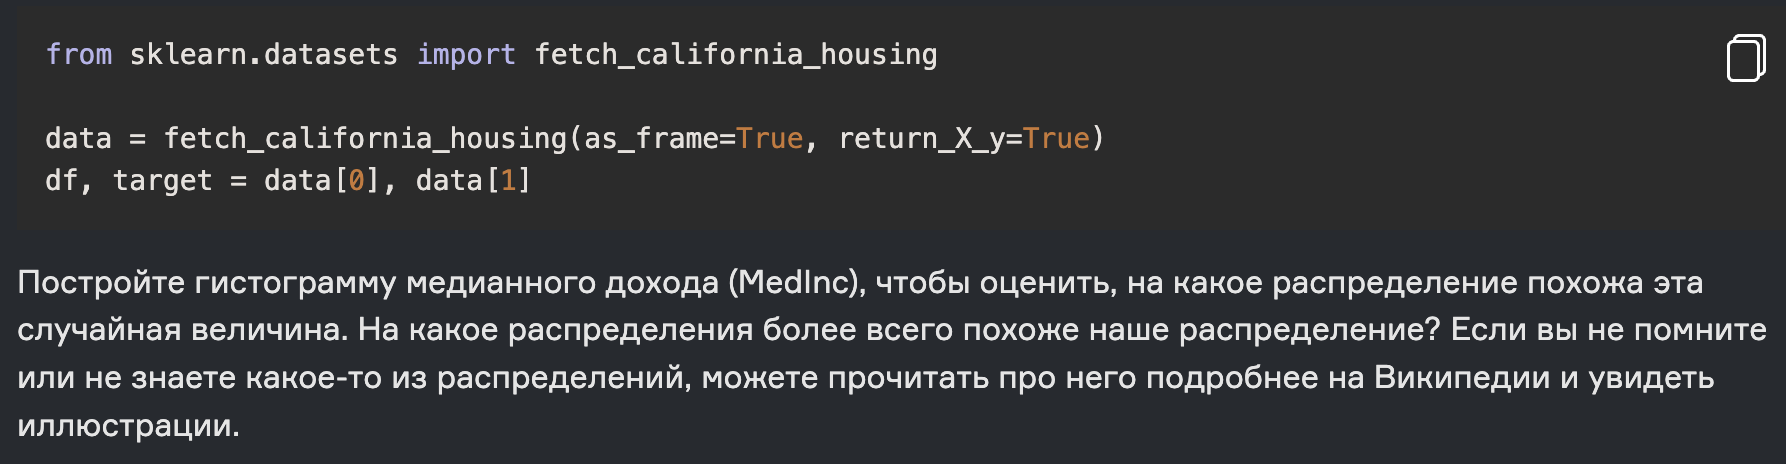

In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

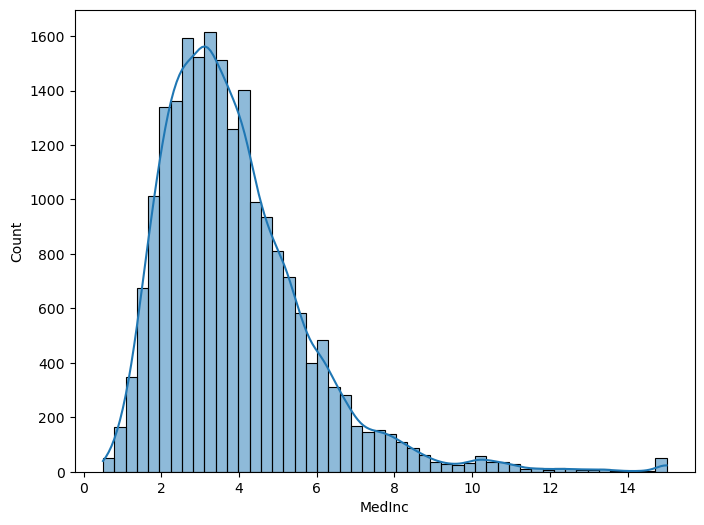

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['MedInc'], bins=50, kde=True)
plt.show()

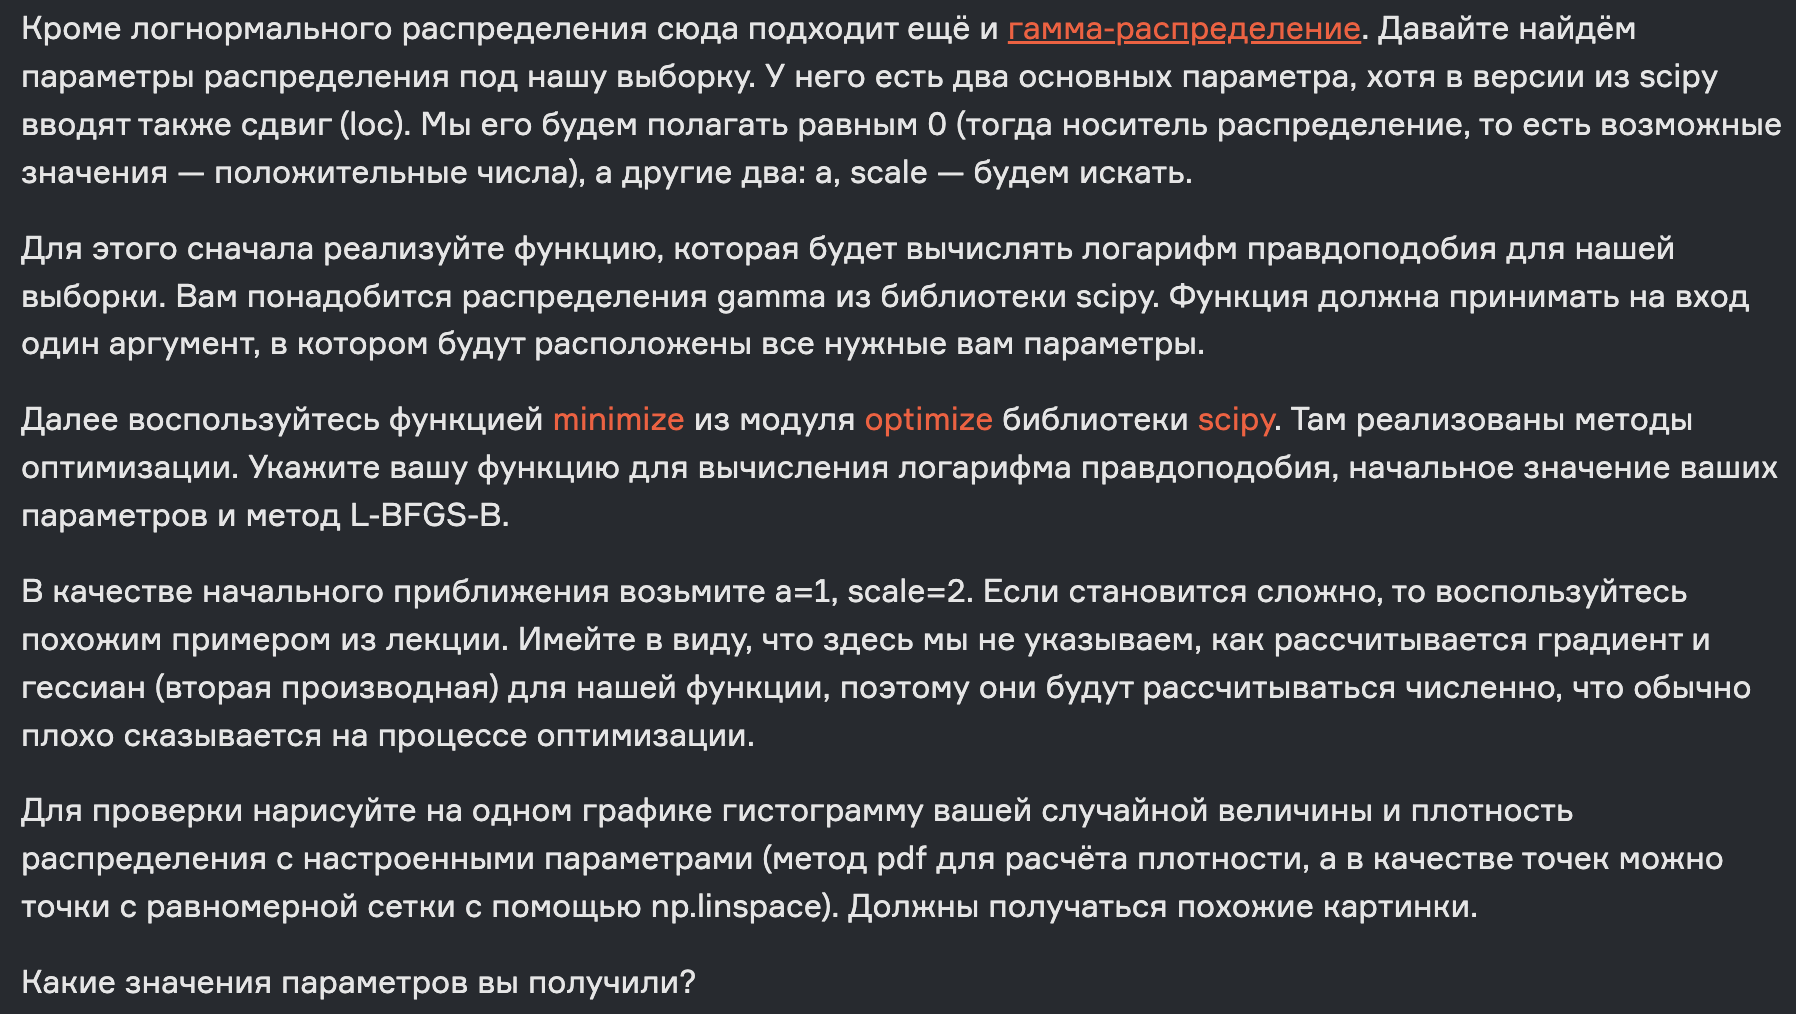

In [20]:
from scipy import stats
from scipy import optimize
import numpy as np

def loglik(theta): #на вход идёт список параметров распределения

    a, scale = theta #раскладываем его на два для удобства

    #считаем логарифм плотности для гамма-распределения
    lpdf = stats.gamma.logpdf(df['MedInc'], a=a, loc=0, scale=scale)

    #считаем лог-правдоподобие для всех значений
    LL = np.sum(lpdf)
    
    #возвращаем с отрицательным знаком 
    #так как дальнейшая функция оптимизирует в сторону уменьшения
    return(-LL)

a=1
scale=2
theta = (a, scale)
result = optimize.minimize(loglik, theta, method='L-BFGS-B')
a_new, scale_new = result.x
print(f'Оцененные параметры a={a_new:.3f}, scale={scale_new:.3f}')

Оцененные параметры a=4.749, scale=0.815


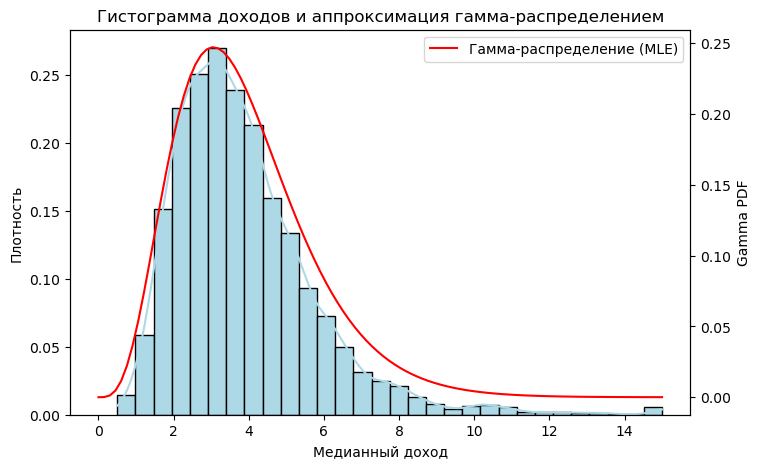

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(0, 15, 100)
y = stats.gamma.pdf(x, a=a_new, loc=0, scale=scale_new)

fig, ax1 = plt.subplots(figsize=(8, 5))

# Гистограмма данных
sns.histplot(df['MedInc'], bins=30, kde=True, color="lightblue", alpha=1, stat="density", ax=ax1)
ax1.set_xlabel("Медианный доход")
ax1.set_ylabel("Плотность")
ax1.set_title("Гистограмма доходов и аппроксимация гамма-распределением")

# Вторая ось Y для плотности гамма-распределения
ax2 = ax1.twinx()
ax2.plot(x, y, "r-", label="Гамма-распределение (MLE)")
ax2.set_ylabel("Gamma PDF")

# Легенда и отображение графика
ax2.legend()
plt.show()


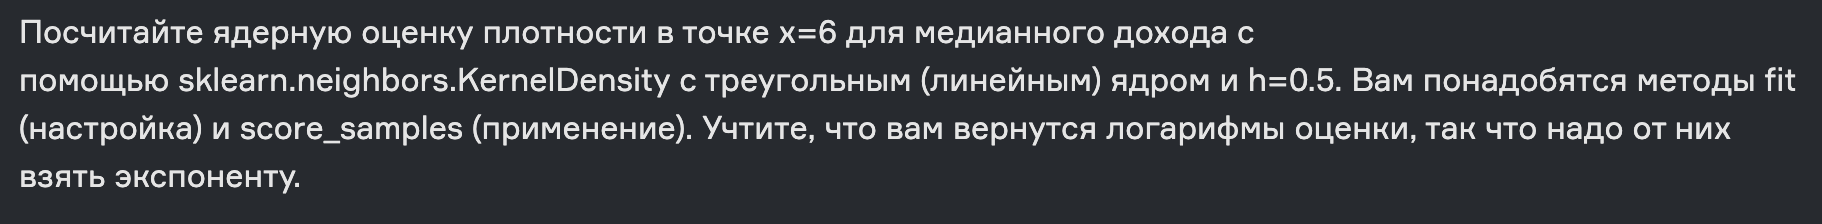

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KernelDensity

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [44]:
med_ink = df['MedInc'].values.reshape(-1, 1) # Преобразуем в 2D массив
kde = KernelDensity(kernel="linear", bandwidth=0.5)
kde.fit(med_ink)

log_density = kde.score_samples([[9]])
exp_density = np.exp(log_density)
print(exp_density)

[0.0073407]


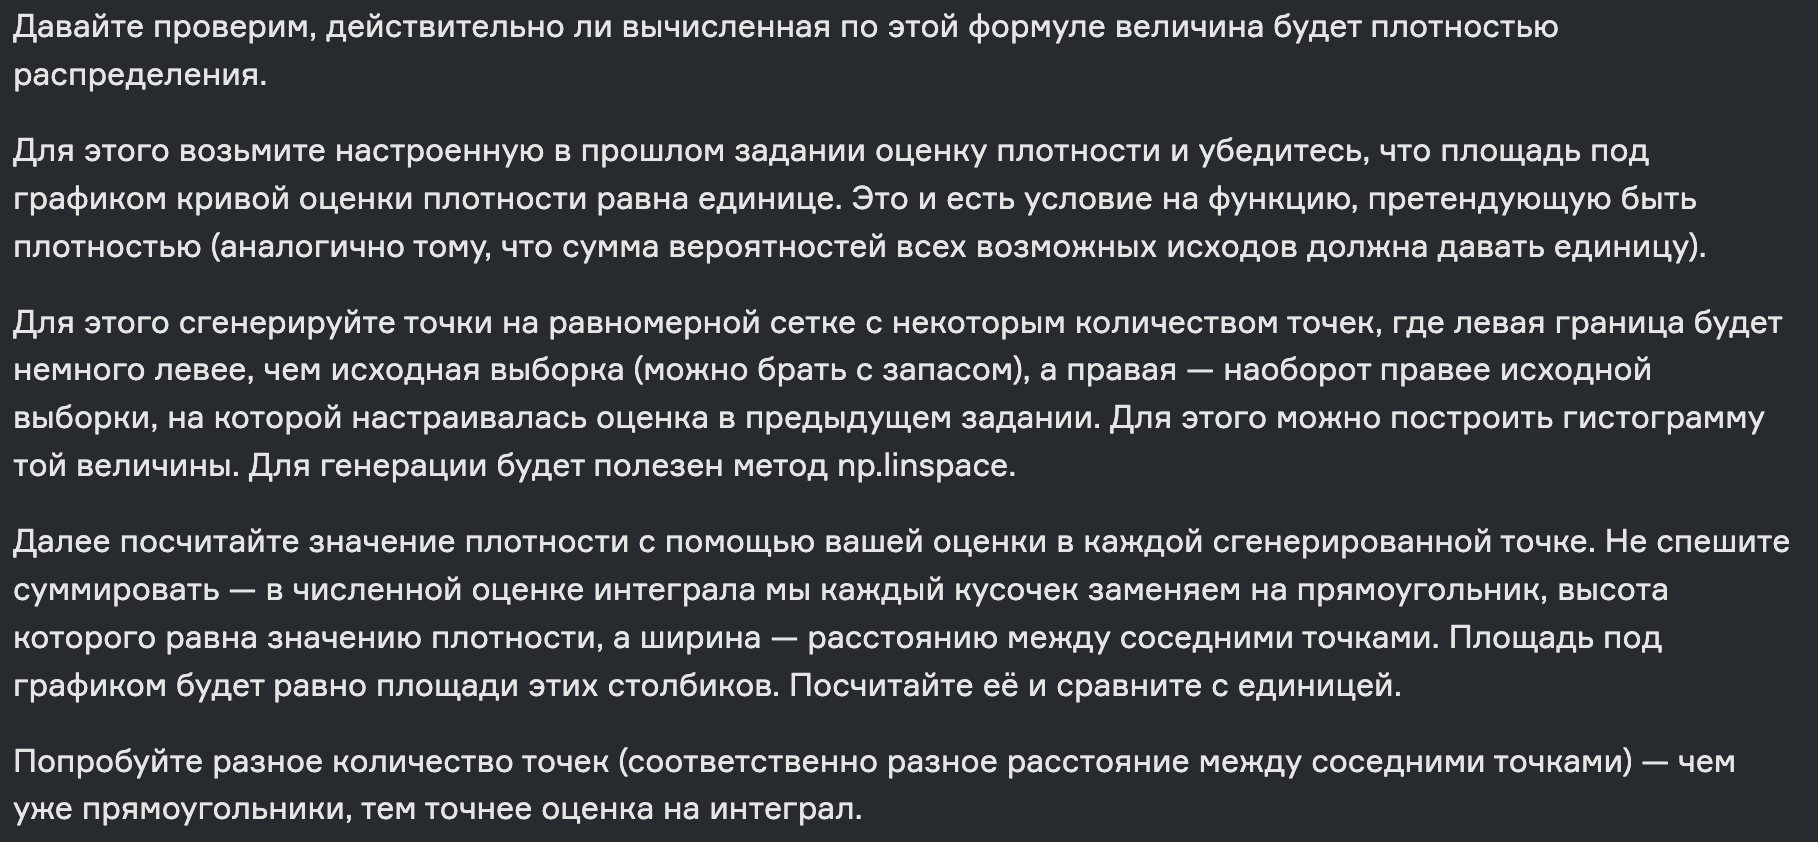

In [52]:
x_vals = np.linspace(med_ink.min() - 1, med_ink.max() + 1, 1000).reshape(-1, 1)  # 1000 точек

log_density = kde.score_samples(x_vals)  
density = np.exp(log_density) 

# Приближенно вычисляем площадь под кривой методом прямоугольников
dx = x_vals[1] - x_vals[0]  # Ширина каждого прямоугольника
integral = np.sum(density * dx)  # Суммируем площади прямоугольников

# Выводим результат
print(f"Приближенная площадь под графиком: {integral:.5f}")


Приближенная площадь под графиком: 1.00000


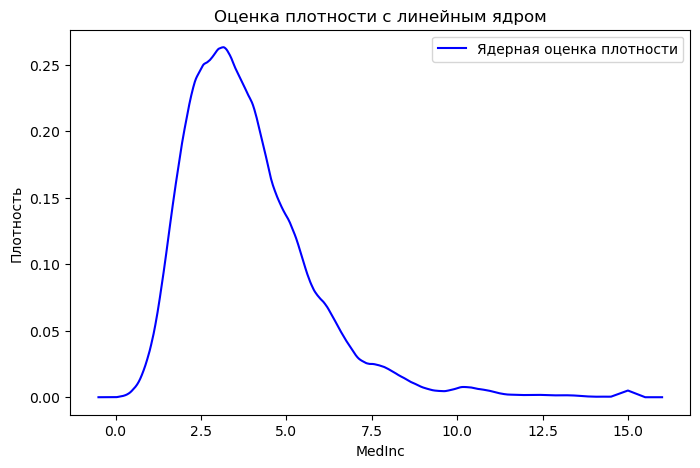

In [49]:
# Визуализация плотности
plt.figure(figsize=(8, 5))
plt.plot(x_vals, density, label="Ядерная оценка плотности", color="blue")
plt.xlabel("MedInc")
plt.ylabel("Плотность")
plt.title("Оценка плотности с линейным ядром")
plt.legend()
plt.show()